In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [3]:
data = pd.read_csv(r'D:\Study\jupyter\pract4\vgsales.csv')
#признак Name не берем
data_sel = data.loc[:, data.columns.isin(['Rank', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'])]
data_sel = data_sel.dropna()
data_sel['Genre'] = np.where(data_sel['Genre'] == 'Sports', 0, 1)
data_sel

,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii,2006.0,0,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,NES,1985.0,1,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Wii,2008.0,1,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii,2009.0,0,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,GB,1996.0,1,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16593,16596,GBA,2002.0,1,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,GC,2003.0,1,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,PS2,2008.0,1,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,DS,2010.0,1,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [6]:
data_sel['Genre'].value_counts()

Genre
1    13987
0     2304
Name: count, dtype: int64

In [3]:
# Просмотр уникальных категориальных данных
for column in data_sel.select_dtypes(include=['object']):
    print(column, data_sel[column].unique())

Platform ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
Publisher ['Nintendo' 'Microsoft Game Studios' 'Take-Two Interactive'
 'Sony Computer Entertainment' 'Activision' 'Ubisoft' 'Bethesda Softworks'
 'Electronic Arts' 'Sega' 'SquareSoft' 'Atari' '505 Games' 'Capcom'
 'GT Interactive' 'Konami Digital Entertainment'
 'Sony Computer Entertainment Europe' 'Square Enix' 'LucasArts'
 'Virgin Interactive' 'Warner Bros. Interactive Entertainment'
 'Universal Interactive' 'Eidos Interactive' 'RedOctane' 'Vivendi Games'
 'Enix Corporation' 'Namco Bandai Games' 'Palcom' 'Hasbro Interactive'
 'THQ' 'Fox Interactive' 'Acclaim Entertainment' 'MTV Games'
 'Disney Interactive Studios' 'Majesco Entertainment' 'Codemasters'
 'Red Orb' 'Level 5' 'Arena Entertainment' 'Midway Games' 'JVC'
 'Deep Silver' '989 Studios' 'NCSoft' 'UEP Systems' 'Parker Bros.' 'Maxis'
 'I

In [4]:
data_sel.head()

,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii,2006.0,0,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,NES,1985.0,1,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Wii,2008.0,1,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii,2009.0,0,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,GB,1996.0,1,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
data_sel.describe()

,Rank,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.858572,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.348473,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,1.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,1.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,1.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [4]:
y = data_sel.Genre
X = data_sel.loc[:, data_sel.columns.isin(['Rank', 'Platform', 'Year', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'])]
X = pd.get_dummies(X) #делаем бинарные переменные из категориальных

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=0)
l=[]
for i in range(2, 30):
    clf = DecisionTreeClassifier(random_state=20, max_depth = i )
    clf.fit(x_train, y_train)
    l.append([clf.score(x_test, y_test)])
    print(str(i) + ": " + str(clf.score(x_test, y_test)))
print(l.index(max(l))+2, max(l))


2: 0.8616328807885438
3: 0.8651664496931374
4: 0.8690719732192672
5: 0.8703738143946439
6: 0.8737214059884694
7: 0.8740933606100055
8: 0.8740933606100055
9: 0.8761391110284545
10: 0.8766970429607588
11: 0.8737214059884694
12: 0.8757671564069184
13: 0.8759531337176865
14: 0.8746512925423099
15: 0.872977496745397
16: 0.8716756555700205
17: 0.8672122001115864
18: 0.8668402454900502
19: 0.8651664496931374
20: 0.8633066765854566
21: 0.8636786312069927
22: 0.8603310396131671
23: 0.8607029942347033
24: 0.8614469034777757
25: 0.8608889715454715
26: 0.8601450623023991
27: 0.8586572438162544
28: 0.8567974707085736
29: 0.8569834480193417
10 [0.8766970429607588]


Самый высокий процент совпадения у дерева с высотой 10

In [17]:
clf = DecisionTreeClassifier(random_state=20, max_depth = 10)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=20)

[Text(0.5, 0.875, 'x[176] <= 0.5\ngini = 0.245\nsamples = 10914\nvalue = [1560, 9354]'),
 Text(0.25, 0.625, 'x[313] <= 0.5\ngini = 0.21\nsamples = 9998\nvalue = [1190, 8808]'),
 Text(0.125, 0.375, 'x[531] <= 0.5\ngini = 0.191\nsamples = 9458\nvalue = [1011, 8447]'),
 Text(0.0625, 0.125, 'gini = 0.178\nsamples = 9167\nvalue = [903, 8264]'),
 Text(0.1875, 0.125, 'gini = 0.467\nsamples = 291\nvalue = [108, 183]'),
 Text(0.375, 0.375, 'x[4] <= 0.045\ngini = 0.443\nsamples = 540\nvalue = [179, 361]'),
 Text(0.3125, 0.125, 'gini = 0.313\nsamples = 299\nvalue = [58, 241]'),
 Text(0.4375, 0.125, 'gini = 0.5\nsamples = 241\nvalue = [121, 120]'),
 Text(0.75, 0.625, 'x[20] <= 0.5\ngini = 0.482\nsamples = 916\nvalue = [370, 546]'),
 Text(0.625, 0.375, 'x[3] <= 0.025\ngini = 0.494\nsamples = 809\nvalue = [360, 449]'),
 Text(0.5625, 0.125, 'gini = 0.488\nsamples = 197\nvalue = [114, 83]'),
 Text(0.6875, 0.125, 'gini = 0.481\nsamples = 612\nvalue = [246, 366]'),
 Text(0.875, 0.375, 'x[0] <= 12885.5\n

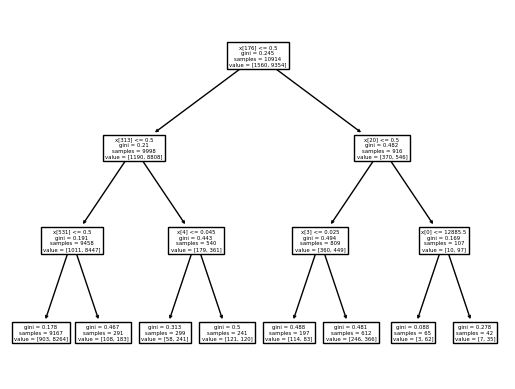

In [9]:
from sklearn.tree import plot_tree

plot_tree(clf)

[Text(0.5, 0.875, 'x[176] <= 0.5\ngini = 0.245\nsamples = 10914\nvalue = [1560, 9354]'),
 Text(0.25, 0.625, 'x[313] <= 0.5\ngini = 0.21\nsamples = 9998\nvalue = [1190, 8808]'),
 Text(0.125, 0.375, 'x[531] <= 0.5\ngini = 0.191\nsamples = 9458\nvalue = [1011, 8447]'),
 Text(0.0625, 0.125, 'gini = 0.178\nsamples = 9167\nvalue = [903, 8264]'),
 Text(0.1875, 0.125, 'gini = 0.467\nsamples = 291\nvalue = [108, 183]'),
 Text(0.375, 0.375, 'x[4] <= 0.045\ngini = 0.443\nsamples = 540\nvalue = [179, 361]'),
 Text(0.3125, 0.125, 'gini = 0.313\nsamples = 299\nvalue = [58, 241]'),
 Text(0.4375, 0.125, 'gini = 0.5\nsamples = 241\nvalue = [121, 120]'),
 Text(0.75, 0.625, 'x[20] <= 0.5\ngini = 0.482\nsamples = 916\nvalue = [370, 546]'),
 Text(0.625, 0.375, 'x[3] <= 0.025\ngini = 0.494\nsamples = 809\nvalue = [360, 449]'),
 Text(0.5625, 0.125, 'gini = 0.488\nsamples = 197\nvalue = [114, 83]'),
 Text(0.6875, 0.125, 'gini = 0.481\nsamples = 612\nvalue = [246, 366]'),
 Text(0.875, 0.375, 'x[0] <= 12885.5\n

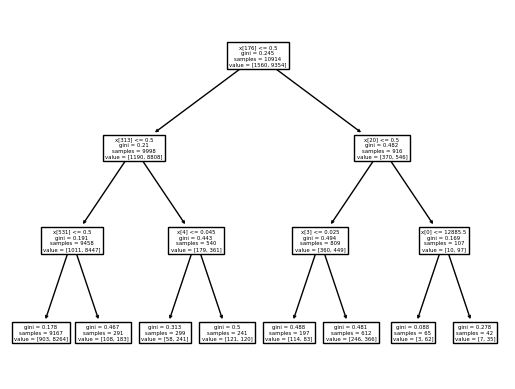

In [10]:
clf = DecisionTreeClassifier(random_state=20, max_depth = 3)
clf.fit(x_train, y_train)
plot_tree(clf) #усеченное дерево

[Text(0.5, 0.875, 'x[176] <= 0.5\ngini = 0.245\nsamples = 10914\nvalue = [1560, 9354]'),
 Text(0.25, 0.625, 'x[313] <= 0.5\ngini = 0.21\nsamples = 9998\nvalue = [1190, 8808]'),
 Text(0.125, 0.375, 'x[531] <= 0.5\ngini = 0.191\nsamples = 9458\nvalue = [1011, 8447]'),
 Text(0.0625, 0.125, 'gini = 0.178\nsamples = 9167\nvalue = [903, 8264]'),
 Text(0.1875, 0.125, 'gini = 0.467\nsamples = 291\nvalue = [108, 183]'),
 Text(0.375, 0.375, 'x[4] <= 0.045\ngini = 0.443\nsamples = 540\nvalue = [179, 361]'),
 Text(0.3125, 0.125, 'gini = 0.313\nsamples = 299\nvalue = [58, 241]'),
 Text(0.4375, 0.125, 'gini = 0.5\nsamples = 241\nvalue = [121, 120]'),
 Text(0.75, 0.625, 'x[20] <= 0.5\ngini = 0.482\nsamples = 916\nvalue = [370, 546]'),
 Text(0.625, 0.375, 'x[3] <= 0.025\ngini = 0.494\nsamples = 809\nvalue = [360, 449]'),
 Text(0.5625, 0.125, 'gini = 0.488\nsamples = 197\nvalue = [114, 83]'),
 Text(0.6875, 0.125, 'gini = 0.481\nsamples = 612\nvalue = [246, 366]'),
 Text(0.875, 0.375, 'x[0] <= 12885.5\n

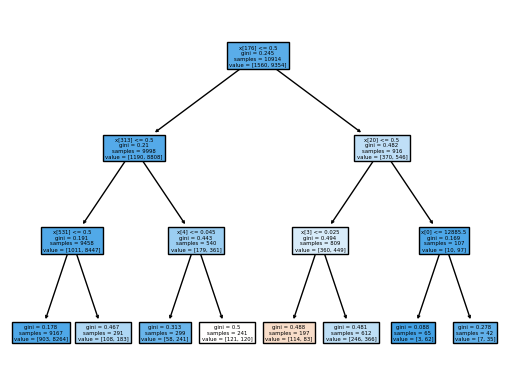

In [11]:
plot_tree(clf, filled=True, impurity=True) 

In [14]:
i=0
for column in X:
    print(column, i)
    i+=1

Rank 0
Year 1
NA_Sales 2
EU_Sales 3
JP_Sales 4
Other_Sales 5
Global_Sales 6
Platform_2600 7
Platform_3DO 8
Platform_3DS 9
Platform_DC 10
Platform_DS 11
Platform_GB 12
Platform_GBA 13
Platform_GC 14
Platform_GEN 15
Platform_GG 16
Platform_N64 17
Platform_NES 18
Platform_NG 19
Platform_PC 20
Platform_PCFX 21
Platform_PS 22
Platform_PS2 23
Platform_PS3 24
Platform_PS4 25
Platform_PSP 26
Platform_PSV 27
Platform_SAT 28
Platform_SCD 29
Platform_SNES 30
Platform_TG16 31
Platform_WS 32
Platform_Wii 33
Platform_WiiU 34
Platform_X360 35
Platform_XB 36
Platform_XOne 37
Publisher_10TACLE Studios 38
Publisher_1C Company 39
Publisher_20th Century Fox Video Games 40
Publisher_2D Boy 41
Publisher_3DO 42
Publisher_49Games 43
Publisher_505 Games 44
Publisher_5pb 45
Publisher_7G//AMES 46
Publisher_989 Sports 47
Publisher_989 Studios 48
Publisher_AQ Interactive 49
Publisher_ASC Games 50
Publisher_ASCII Entertainment 51
Publisher_ASCII Media Works 52
Publisher_ASK 53
Publisher_Abylight 54
Publisher_Acclai

In [18]:
importances = clf.feature_importances_
importances

array([0.06334029, 0.10181385, 0.10247619, 0.08578745, 0.06483142,
       0.03863561, 0.03719184, 0.        , 0.        , 0.00151187,
       0.        , 0.01764896, 0.        , 0.00470199, 0.00520399,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.0399023 , 0.        , 0.00428564, 0.00409876, 0.0063483 ,
       0.        , 0.00261141, 0.00064794, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.02554559, 0.        ,
       0.00535671, 0.00446338, 0.00195467, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00873308, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00648622, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.02447187, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [19]:
for i in range(len(importances)):
    if importances[i]>0.1:
        print(i)

1
2
176


In [10]:
y_pred = clf.predict(x_test)

In [11]:
test = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
test.head(20)

,Actual,Predicted
7993,1,1
7899,1,1
14987,1,1
10496,1,1
14556,1,1
6985,1,1
9316,1,1
7269,0,1
14165,1,1
602,1,1


              precision    recall  f1-score   support

           0       0.63      0.26      0.37       744
           1       0.89      0.98      0.93      4633

    accuracy                           0.88      5377
   macro avg       0.76      0.62      0.65      5377
weighted avg       0.86      0.88      0.85      5377



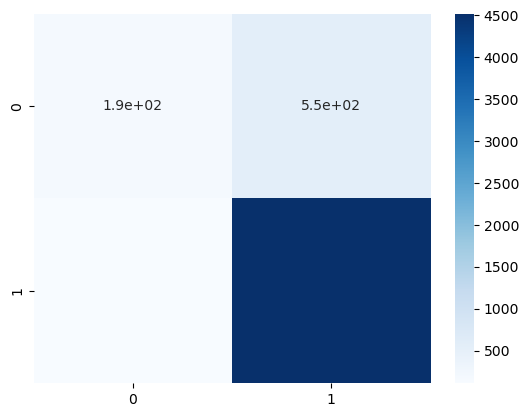

In [12]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
print(classification_report(y_test, y_pred))

f1<0.5, плохая модель, мы не можем определить, относится ли игра к жанру Sports.

In [6]:
from sklearn.ensemble import RandomForestClassifier

# создаём классификатор случайного леса с кол-во деревьев = 100
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=20)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

              precision    recall  f1-score   support

           0       0.59      0.29      0.39       744
           1       0.90      0.97      0.93      4633

    accuracy                           0.87      5377
   macro avg       0.74      0.63      0.66      5377
weighted avg       0.85      0.87      0.86      5377



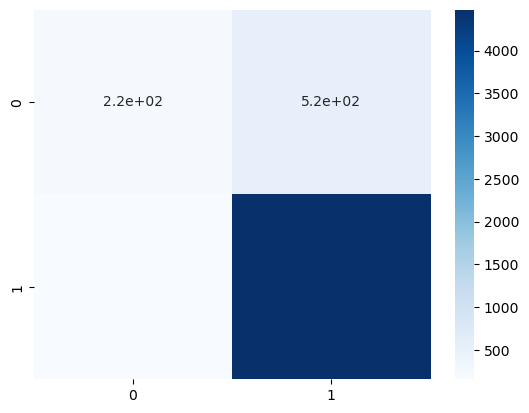

In [14]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
print(classification_report(y_test, y_pred))

In [7]:
# параметры, по которым будет производить подбор
param_grid = { 
    'n_estimators': [200, 300, 400], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': range(2,36,3),
    'criterion':['gini']
} 
#'min_samples_split': range(2, 40, 10),
#'min_samples_leaf': range(2, 40, 10), 

In [8]:
from sklearn.model_selection import GridSearchCV

In [16]:
from sklearn.model_selection import GridSearchCV

# произведём подбор наилучших параметров для модели с кросс-валидацией = 5
cv_clf = GridSearchCV(estimator=RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=20), param_grid=param_grid, cv= 5, refit = True)

In [17]:
cv_clf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=20),
             param_grid={'criterion': ['gini'], 'max_depth': range(2, 36, 3),
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [200, 300, 400]})

In [22]:
cv_clf.best_params_

{'criterion': 'gini',
 'max_depth': 17,
 'max_features': None,
 'n_estimators': 400}

              precision    recall  f1-score   support

           0       0.67      0.31      0.43       744
           1       0.90      0.97      0.94      4633

    accuracy                           0.88      5377
   macro avg       0.78      0.64      0.68      5377
weighted avg       0.87      0.88      0.86      5377



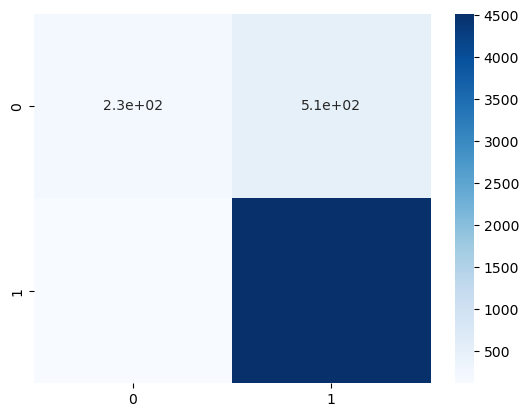

In [26]:
y_pred = cv_clf.predict(x_test)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
print(classification_report(y_test, y_pred))

значение f1 улучшилось, но все равно мало.

In [29]:
param_grid = { 
    'n_estimators': [350, 400, 450], 
    'max_features': [None], 
    'max_depth': range(10,30,3),
    'criterion':['gini']
} 

In [31]:
cv_clf = GridSearchCV(estimator=RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=20), param_grid=param_grid, cv= 5, refit = True)

In [32]:
cv_clf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=20),
             param_grid={'criterion': ['gini'], 'max_depth': range(10, 30, 3),
                         'max_features': [None],
                         'n_estimators': [350, 400, 450]})

In [33]:
cv_clf.best_params_

{'criterion': 'gini',
 'max_depth': 16,
 'max_features': None,
 'n_estimators': 400}

In [35]:
param_grid = { 
    'n_estimators': [375, 400, 425], 
    'max_features': [None], 
    'max_depth': range(12,30,3),
    'criterion':['gini']
} 

In [36]:
cv_clf = GridSearchCV(estimator=RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=20), param_grid=param_grid, cv= 5, refit = True)

In [37]:
cv_clf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=20),
             param_grid={'criterion': ['gini'], 'max_depth': range(12, 30, 3),
                         'max_features': [None],
                         'n_estimators': [375, 400, 425]})

In [38]:
cv_clf.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'max_features': None,
 'n_estimators': 375}

In [9]:
param_grid = { 
    'n_estimators': [375, 385], 
    'max_features': [None], 
    'max_depth': range(10,25,3),
    'criterion':['gini']
} 

In [10]:
cv_clf = GridSearchCV(estimator=RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=20), param_grid=param_grid, cv= 5, refit = True)


In [11]:
cv_clf.fit(x_train, y_train)

In [49]:
cv_clf.best_params_

{'criterion': 'gini',
 'max_depth': 16,
 'max_features': None,
 'n_estimators': 385}

In [1]:
importances = cv_clf.feature_importances_
importances

NameError: name 'cv_clf' is not defined

              precision    recall  f1-score   support

           0       0.68      0.31      0.43       744
           1       0.90      0.98      0.94      4633

    accuracy                           0.88      5377
   macro avg       0.79      0.64      0.68      5377
weighted avg       0.87      0.88      0.87      5377



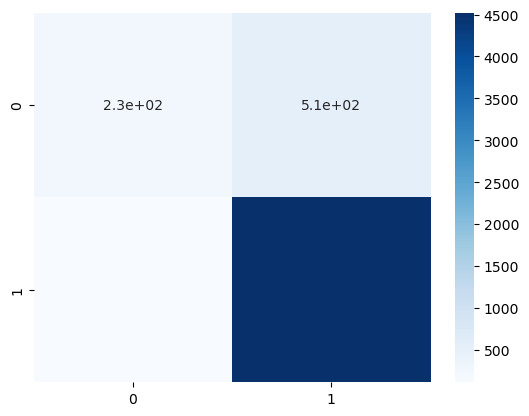

In [50]:
y_pred = cv_clf.predict(x_test)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
print(classification_report(y_test, y_pred))

Максимальное значение f1, которого удалось достичь с таким набором параметров с помощью gridsearch - 0.43. 
Это значит, что мы все еще не можем определить, относится ли игра к жанру Sports. 
Большинство наших признаков почти ничего не может сказать о жанре игры, 
поэтому, вероятно, с помощью данного набора признаков, не удасться классифицировать игры по жанрам.